In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import sigmoid_kernel
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend
from keras.layers import Dense
from keras.models import load_model, Sequential
from sklearn.metrics import roc_curve, auc
import keras as keras
from sklearn.metrics import confusion_matrix

# tWZ-ttZ

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [28]:
df1 = pd.read_csv('tWZ+ttZ (1).csv')#
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']

X1 = X1.drop(['delPhi_0_lep_MET','MET','num_jets','num_bjets','num_fake_leps','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#	mu_pt_1	mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.6, test_size=0.4, shuffle=True)
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_test,y1_test, train_size=0.5, test_size=0.5, shuffle=True)

In [30]:
scaler1 = StandardScaler()
scaler_train1 = scaler1.fit(X1_train)
X1_train = scaler1.transform(X1_train)
scaler_test1 = scaler1.fit(X1_test)
X1_test = scaler1.transform(X1_test)
scaler_val1 = scaler1.fit(X1_val)
X1_val = scaler1.transform(X1_val)

## Defining the Model

In [37]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.5,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model = Sequential()
model.add(Dense(X1.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(X1.shape[1]/4), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(X1.shape[1]/2), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history1 = model.fit(X1_train, y1_train, epochs=20, validation_data=(X1_val, y1_val), callbacks=None)
model.summary()

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6619 - loss: 0.6056 - mae: 0.4365 - val_accuracy: 0.7900 - val_loss: 0.4461 - val_mae: 0.3129
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7860 - loss: 0.4545 - mae: 0.3144 - val_accuracy: 0.7937 - val_loss: 0.4351 - val_mae: 0.2903
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8009 - loss: 0.4319 - mae: 0.2906 - val_accuracy: 0.7958 - val_loss: 0.4336 - val_mae: 0.2901
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.4465 - mae: 0.2961 - val_accuracy: 0.7955 - val_loss: 0.4333 - val_mae: 0.2885
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7984 - loss: 0.4368 - mae: 0.2920 - val_accuracy: 0.7943 - val_loss: 0.4327 - val_mae: 0.2860
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7979 - loss: 0.4310 - mae: 0.2886 - val_accuracy: 0.7937 - val_loss: 0.4326 - val_mae: 0.2875
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (32, 17)                    │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 17)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (32, 4)                     │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 4)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (32, 8)                     │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 8)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 1)                     │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 856 (3.35 KB)

In [38]:
y_pred1 = model.predict(X1_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
signal, bg0 = [],[]
j = 0
for index in y1_test.index:
    if y1_test[index] == 0:
        bg0.append(float(y_pred1[j][0]))
    else:
        signal.append(float(y_pred1[j][0]))
    j+=1

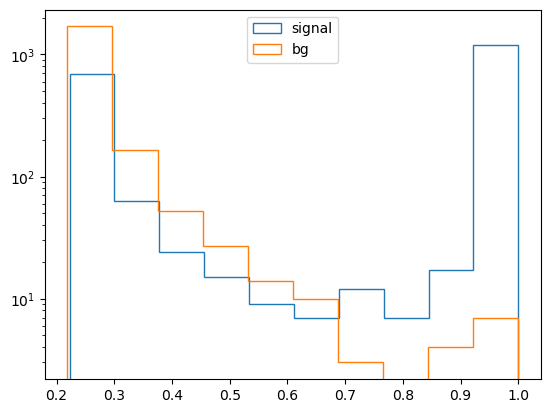

In [40]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg0, histtype='step', label='bg')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

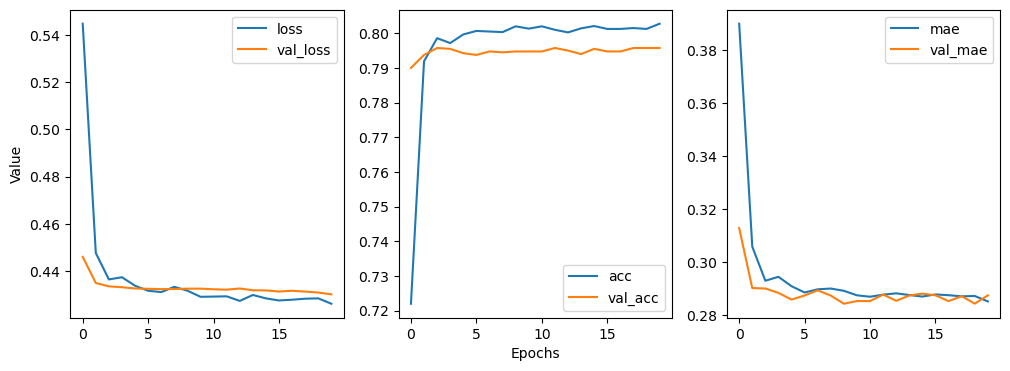

In [41]:
params1 = pd.DataFrame(history1.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params1['loss'], label='loss')
ax1.plot(params1['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params1['accuracy'], label='acc')
ax2.plot(params1['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params1['mae'], label='mae')
ax3.plot(params1['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

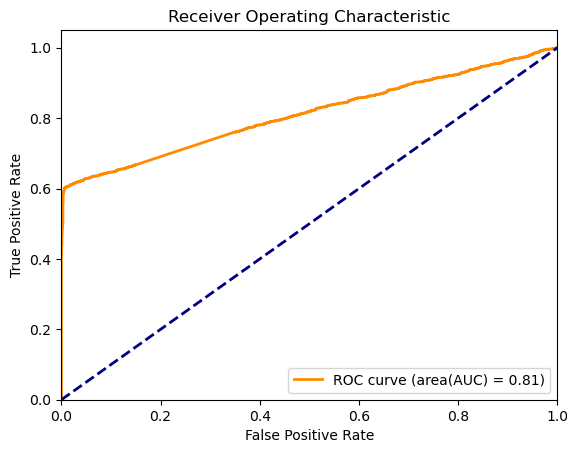

0.8112609142559104


In [42]:
fpr, tpr, _ = roc_curve(y1_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# ttZ-vs-Background Classification

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [43]:
df2 = pd.read_csv('ttZ+bkg.csv')#
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [44]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, train_size=0.6, test_size=0.4, shuffle=True)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test,y2_test, train_size=0.5, test_size=0.5, shuffle=True)

In [45]:
scaler2 = StandardScaler()
scaler_train2 = scaler2.fit(X2_train)
X2_train = scaler2.transform(X2_train)
scaler_test = scaler2.fit(X2_test)
X2_test = scaler2.transform(X2_test)
scaler_val2 = scaler2.fit(X2_val)
X2_val = scaler2.transform(X2_val)

## Defining the Model

In [46]:
history2 = model.fit(X2_train, y2_train, epochs=20, validation_data=(X2_val, y2_val), callbacks=None)
model.summary()

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node StatefulPartitionedCall/sequential_3_1/dense_12_1/Relu defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [32,48], In[1]: [17,17]
	 [[{{node StatefulPartitionedCall/sequential_3_1/dense_12_1/Relu}}]] [Op:__inference_one_step_on_iterator_218647]

In [97]:
y_pred2 = model.predict(X2_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
bg1, bg2 = [],[]
j = 0
for index in y2_test.index:
    if y2_test[index] == 0:
        bg2.append(float(y_pred2[j][0]))
    else:
        bg1.append(float(y_pred2[j][0]))
    j+=1

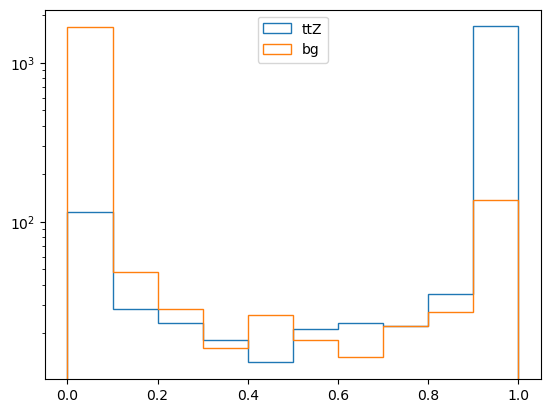

In [99]:
plt.hist(bg1, histtype='step', label='ttZ')
plt.hist(bg2, histtype='step', label='bg')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

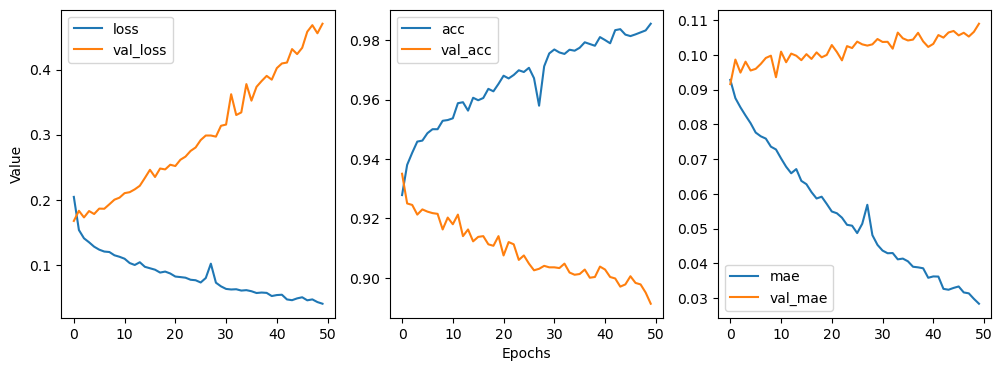

In [100]:
params2 = pd.DataFrame(history2.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params2['loss'], label='loss')
ax1.plot(params2['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params2['accuracy'], label='acc')
ax2.plot(params2['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params2['mae'], label='mae')
ax3.plot(params2['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

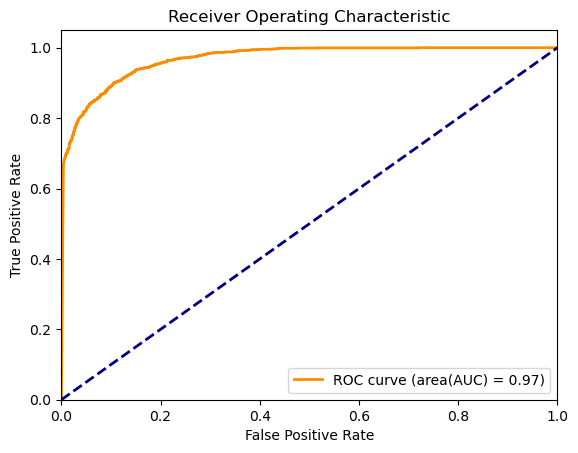

0.967998324905776


In [101]:
fpr, tpr, _ = roc_curve(y2_test, y_pred2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# tWZ -vs- All Background

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [112]:
df0, df_ = pd.read_csv('ttZ+bkg.csv'), pd.read_csv('tWZ+ttZ (1).csv')#
df = pd.concat([df0, df_])
df = df.dropna()
X = df.drop(['label'], axis=1)
y = df['label']

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.6, test_size=0.4, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, train_size=0.5, test_size=0.5, shuffle=True)

In [108]:
scaler = StandardScaler()
scaler_train = scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler_test = scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler_val = scaler2.fit(X_val)
X_val = scaler.transform(X_val)

## Defining the Model

In [130]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model0 = Sequential()
model0.add(Dense(30, activation='relu'))
model0.add(Dense(40, activation='relu'))
model0.add(Dense(10, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history = model0.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=None)
model0.summary()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6663 - loss: 0.6073 - mae: 0.4167 - val_accuracy: 0.8002 - val_loss: 0.4256 - val_mae: 0.2851
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4211 - mae: 0.2805 - val_accuracy: 0.8037 - val_loss: 0.4139 - val_mae: 0.2823
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.4082 - mae: 0.2745 - val_accuracy: 0.8043 - val_loss: 0.4111 - val_mae: 0.2729
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4013 - mae: 0.2703 - val_accuracy: 0.8058 - val_loss: 0.4096 - val_mae: 0.2677
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.3983 - mae: 0.2670 - val_accuracy: 0.8075 - val_loss: 0.4110 - val_mae: 0.2601
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8143 - loss: 0.3877 - mae: 0.2581 - val_accuracy: 0.7935 - val_loss: 0.4210 - val_mae: 0.2842
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                     │ (32, 30)                    │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (32, 40)                    │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (32, 10)                    │             410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,485 (37.05 KB)

 Trainable params: 3,161 (12.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,324 (24.71 KB)

In [131]:
y_pred = model0.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [128]:
signal, bg = [],[]
j = 0
for index in y_test.index:
    if y_test[index] == 0:
        bg.append(float(y_pred[j][0]))
    else:
        signal.append(float(y_pred[j][0]))
    j+=1

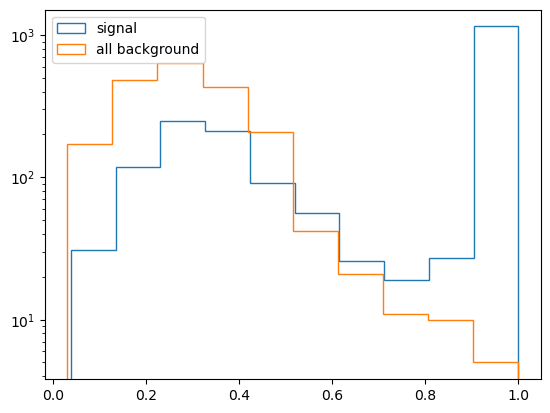

In [129]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg, histtype='step', label='all background')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

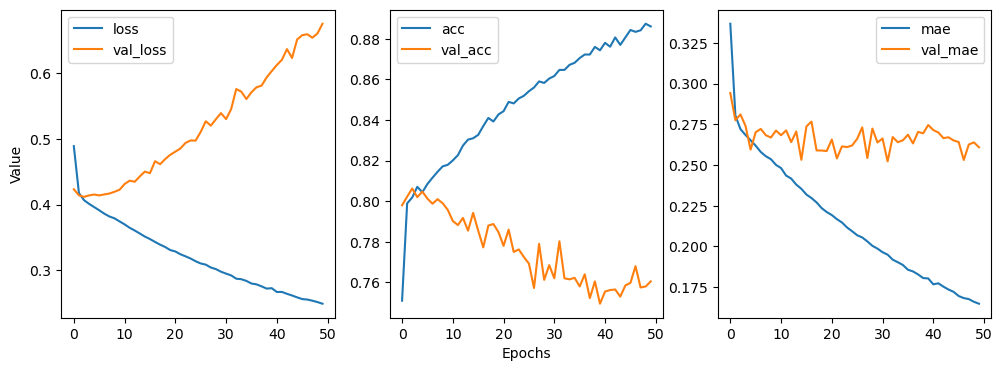

In [117]:
params = pd.DataFrame(history.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params['loss'], label='loss')
ax1.plot(params['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params['accuracy'], label='acc')
ax2.plot(params['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params['mae'], label='mae')
ax3.plot(params['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

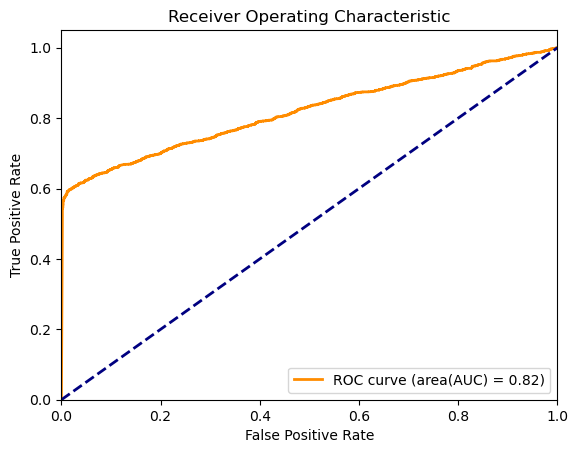

0.8185855079334241


In [118]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# Git Repository Stuff

In [6]:
!git config --global user.email "ltskar009@myuct.ac.za"

In [2]:
!git add .

In [7]:
!git commit -m "Add Jupyter Notebook"

[main 35a032b] Add Jupyter Notebook
 5 files changed, 41491 insertions(+)
 create mode 100644 ANN_model.keras
 create mode 100644 Code.ipynb
 create mode 100644 ROC-AUC-Curves.png
 create mode 100644 tWZ+ttZ (1).csv
 create mode 100644 ttz+bkg.csv


In [8]:
!git push

To https://github.com/KaraboLetsholo/3rd-Year-Project-.git
   707f676..35a032b  main -> main
